# Load Annotated Dataset

In [1]:
!gdown "1voIYkLo8AEnaS60laX3_NMw1diKSKd62"

Downloading...
From: https://drive.google.com/uc?id=1voIYkLo8AEnaS60laX3_NMw1diKSKd62
To: /content/chair.v2i.darknet.zip
100% 12.8M/12.8M [00:00<00:00, 19.4MB/s]


In [21]:

!unzip "/content/chair.v2i.darknet.zip" -d /content/chairs


Archive:  /content/chair.v2i.darknet.zip
  inflating: /content/chairs/README.dataset.txt  
  inflating: /content/chairs/README.roboflow.txt  
   creating: /content/chairs/test/
 extracting: /content/chairs/test/IMG_3877_jpg.rf.55fa58bbc5e23bfae65a18a6dc1d1135.jpg  
  inflating: /content/chairs/test/IMG_3877_jpg.rf.55fa58bbc5e23bfae65a18a6dc1d1135.txt  
 extracting: /content/chairs/test/IMG_3882_jpg.rf.0ea56cac68fb9cb2c97560f01cf23578.jpg  
  inflating: /content/chairs/test/IMG_3882_jpg.rf.0ea56cac68fb9cb2c97560f01cf23578.txt  
 extracting: /content/chairs/test/IMG_3904_jpg.rf.9f7163caba9df9a24eb4df82269a80c8.jpg  
  inflating: /content/chairs/test/IMG_3904_jpg.rf.9f7163caba9df9a24eb4df82269a80c8.txt  
 extracting: /content/chairs/test/IMG_3907_jpg.rf.6d5e168689a9a0123d4ab1a872997a39.jpg  
  inflating: /content/chairs/test/IMG_3907_jpg.rf.6d5e168689a9a0123d4ab1a872997a39.txt  
 extracting: /content/chairs/test/IMG_3911_jpg.rf.d56ca05f2547f55fc1574cd076a85aed.jpg  
  inflating: /content/

In [22]:

import os

def print_directory_tree(root_dir):
  for dirpath, dirnames, filenames in os.walk(root_dir):
    level = dirpath.replace(root_dir, '').count(os.sep)
    indent = '  ' * level
    print('{}{}/'.format(indent, os.path.basename(dirpath)))
    subindent = '  ' * (level + 1)
    for f in filenames:
      print('{}{}'.format(subindent, f))

print_directory_tree('/content/chairs')

chairs/
  README.dataset.txt
  README.roboflow.txt
  valid/
    IMG_3874_jpg.rf.ce5de81d57297dea07e64185c69aaef8.jpg
    IMG_4056_jpg.rf.54a57cef05771ea013d0060524ad993d.jpg
    IMG_3867_jpg.rf.7ea692624cab5617ccc5943e45ac6117.jpg
    IMG_3965_jpg.rf.b5e6dae5a0f51f0f8bd0683671ea9afd.jpg
    IMG_4065_jpg.rf.4b4824c0635a5d58ab93c197d2611204.jpg
    IMG_3867_jpg.rf.7ea692624cab5617ccc5943e45ac6117.txt
    IMG_3869_jpg.rf.47dd92992ae64013410bcb68ce94d1cc.jpg
    IMG_3969_jpg.rf.0bb911dd041b52b006633305d377c226.txt
    IMG_3961_jpg.rf.51d6f46fdf391adc4b74cc00ba7234e6.txt
    IMG_3875_jpg.rf.46164e04353250538842451e762720e7.txt
    IMG_3957_jpg.rf.b61751471322df7ff38d936622b89ab1.jpg
    IMG_3961_jpg.rf.51d6f46fdf391adc4b74cc00ba7234e6.jpg
    IMG_3925_jpg.rf.f6f1da48a88b916044e56f89d7fd2871.txt
    IMG_3894_jpg.rf.840a56ebb0089b4064a7f9d0546e4072.txt
    IMG_3869_jpg.rf.47dd92992ae64013410bcb68ce94d1cc.txt
    IMG_3894_jpg.rf.840a56ebb0089b4064a7f9d0546e4072.jpg
    IMG_4065_jpg.rf.4b4824c0

In [17]:
!rm -r /content/chairs

# Data Exploration

In [9]:
# Install the DejaVu Sans font
!apt-get update
!apt-get install -y fonts-dejavu


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,279 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,113 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ub

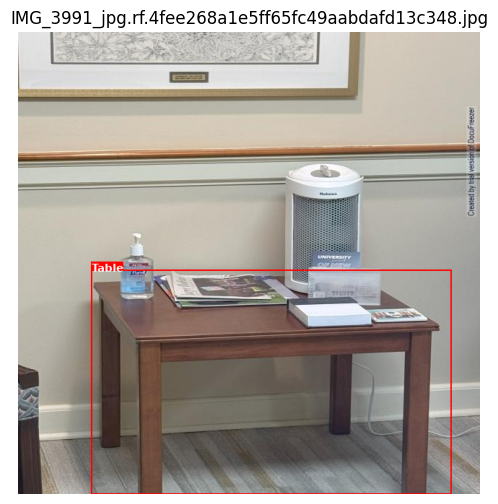

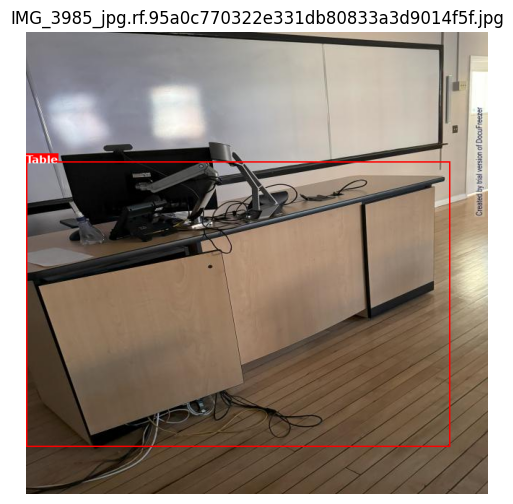

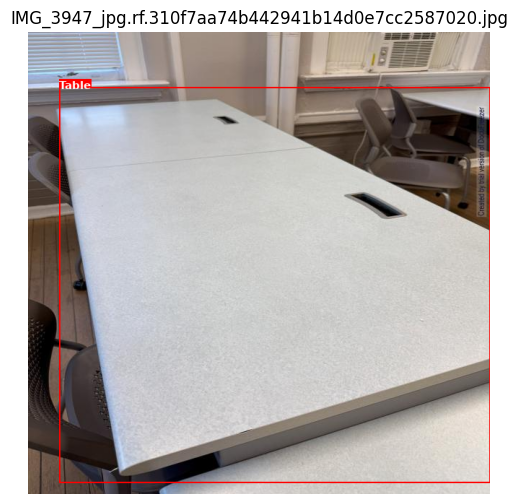

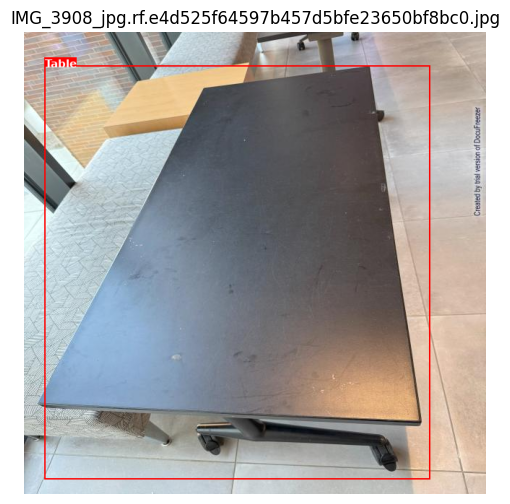

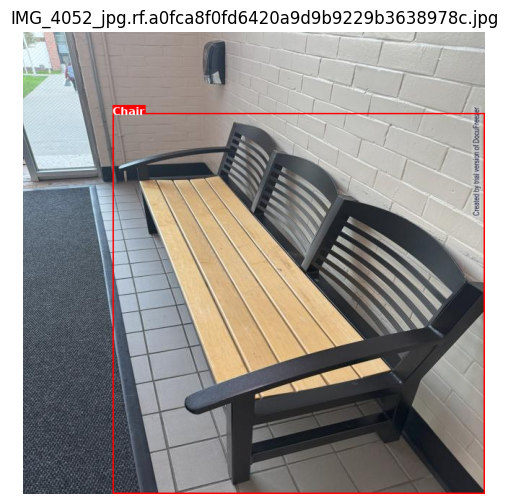

In [12]:
import os
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def print_samples_with_annotations(dataset_path, num_samples=5):
    """
    Displays sample images with bounding box annotations and class labels from the chairs dataset.

    Parameters:
    - dataset_path (str): Path to the 'chairs' dataset directory.
    - num_samples (int): Number of samples to display.
    """

    # Define subdirectories to search for images
    subdirs = ['valid', 'train', 'test']

    # Collect all image file paths
    image_extensions = ['*.jpg', '*.jpeg', '*.png']
    image_paths = []
    for subdir in subdirs:
        for ext in image_extensions:
            image_paths.extend(glob.glob(os.path.join(dataset_path, subdir, ext)))

    if not image_paths:
        print("No images found in the specified dataset path.")
        return

    # Randomly select samples
    sampled_images = random.sample(image_paths, min(num_samples, len(image_paths)))

    # Define class ID to class name mapping
    class_names = {
        0: 'Table',
        1: 'Trash Can',
        2: 'Chair',
    }

    # Specify the path to the DejaVu Sans font installed via apt-get
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"

    # Attempt to load the specified font; fall back if unavailable
    try:
        font = ImageFont.truetype(font_path, size=15)
    except IOError:
        print(f"Font not found at {font_path}. Using default PIL font.")
        font = ImageFont.load_default()

    for img_path in sampled_images:
        # Load image
        try:
            image = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            continue

        draw = ImageDraw.Draw(image)
        img_width, img_height = image.size

        # Determine corresponding annotation file
        txt_path = os.path.splitext(img_path)[0] + '.txt'

        if os.path.exists(txt_path):
            with open(txt_path, 'r') as f:
                lines = f.readlines()

            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    print(f"Invalid annotation format in {txt_path}: {line}")
                    continue

                class_id, x_center, y_center, width, height = map(float, parts)

                # Convert normalized coordinates to pixel values
                x_center *= img_width
                y_center *= img_height
                width *= img_width
                height *= img_height

                # Calculate top-left and bottom-right coordinates
                x1 = x_center - width / 2
                y1 = y_center - height / 2
                x2 = x_center + width / 2
                y2 = y_center + height / 2

                # Draw rectangle
                draw.rectangle([x1, y1, x2, y2], outline="red", width=2)

                # Get class label
                class_label = class_names.get(int(class_id), str(int(class_id)))

                # Calculate text size using font.getbbox
                # getbbox returns (left, top, right, bottom)
                bbox = font.getbbox(class_label)
                text_width = bbox[2] - bbox[0]
                text_height = bbox[3] - bbox[1]

                # Position for the text background
                text_background_x1 = x1
                text_background_y1 = max(y1 - text_height, 0)  # Ensure it doesn't go above the image
                text_background_x2 = x1 + text_width
                text_background_y2 = y1

                # Draw semi-transparent rectangle behind text for better visibility
                draw.rectangle([text_background_x1, text_background_y1, text_background_x2, text_background_y2], fill="red")

                # Draw text
                draw.text((x1, text_background_y1), class_label, fill="white", font=font)

        else:
            print(f"No annotation file found for image {img_path}.")

        # Display the image
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.title(os.path.basename(img_path))
        plt.show()



# Now, run the function
dataset_directory = "/content/chairs"
print_samples_with_annotations(dataset_directory, num_samples=5)


# Model Implementation

In [ ]:
# ===============================================
# Comprehensive YOLOv7 Implementation for Indoor Object Detection and Distance Estimation
# ===============================================

# -----------------------------------------------
# 1. Environment Setup
# -----------------------------------------------
# Install necessary system packages, clone YOLOv7 repository, install dependencies, and download pre-trained weights.

# Install system packages
!apt-get update
!apt-get install -y wget git unzip

# Install DejaVu Sans font for text rendering
!apt-get install -y fonts-dejavu

# Clone the YOLOv7 repository
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7

# Install Python dependencies
!pip install -r requirements.txt

# Download pre-trained YOLOv7 weights
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [27]:
# -----------------------------------------------
# 2. Configuration Files Creation
# -----------------------------------------------
# Create necessary YAML configuration files for the dataset.

import os

# Define the path to your dataset
dataset_path = "/content/chairs"

# Verify dataset directories
assert os.path.exists(os.path.join(dataset_path, "train")), "Train directory not found."
assert os.path.exists(os.path.join(dataset_path, "valid")), "Validation directory not found."
assert os.path.exists(os.path.join(dataset_path, "test")), "Test directory not found."

print("Dataset directories verified.")

# Create dataset configuration file (chairs.yaml)
dataset_yaml = f"""
train: {os.path.join(dataset_path, 'train')}
val: {os.path.join(dataset_path, 'valid')}
test: {os.path.join(dataset_path, 'test')}

nc: 3
names: ['Table', 'Trash Can', 'Chair']
"""

# Write the YAML content to data/chairs.yaml
os.makedirs("data", exist_ok=True)
with open('data/chairs.yaml', 'w') as f:
    f.write(dataset_yaml)

print("Dataset configuration file 'data/chairs.yaml' created successfully.")

# -----------------------------------------------
# 3. Model Configuration Adjustment
# -----------------------------------------------
# Modify the YOLOv7 model configuration to match the number of classes.

# Path to the model configuration file
model_cfg = 'cfg/training/yolov7.yaml'

# Read the existing configuration
with open(model_cfg, 'r') as f:
    model_data = f.read()

# Modify 'nc' to 3 (number of classes)
if 'nc: 80' in model_data:
    model_data = model_data.replace('nc: 80', 'nc: 3')
    print("Updated 'nc' from 80 to 3 in the model configuration.")
else:
    print("'nc: 80' not found in the model configuration. Please verify the model configuration file.")

# Write the modified configuration back
with open(model_cfg, 'w') as f:
    f.write(model_data)

print(f"Model configuration '{model_cfg}' updated.")

# -----------------------------------------------
# 4. Training the Model
# -----------------------------------------------
# Train the YOLOv7 model on your custom dataset.

# Define training parameters
data_yaml = 'data/chairs.yaml'
weights_path = 'yolov7.pt'  # Pre-trained weights
batch_size = 8
epochs = 50  # Adjust based on your requirements

# Start training
!python train.py --img 640 --batch {batch_size} --epochs {epochs} --data {data_yaml} --cfg {model_cfg} --weights {weights_path} --device 0

# -----------------------------------------------
# 5. Model Evaluation
# -----------------------------------------------
# Evaluate the trained model on validation and test datasets and calculate average loss.

import pandas as pd

# Path to the best trained weights
# Adjust 'exp' to your specific experiment folder if multiple experiments exist (e.g., 'exp2', 'exp3', etc.)
best_weights = 'runs/train/exp/weights/best.pt'

# Check if the best_weights file exists
if not os.path.exists(best_weights):
    print(f"Best weights not found at '{best_weights}'. Please check the training logs.")
else:
    # Evaluate on the validation set
    print("Evaluating on the validation set...")
    !python test.py --weights {best_weights} --data {data_yaml} --img 640 --batch {batch_size} --device 0

    # Evaluate on the test set
    print("Evaluating on the test set...")
    !python test.py --weights {best_weights} --data {data_yaml} --img 640 --batch {batch_size} --device 0 --task test

    # Calculate average training and validation losses
    results_csv = 'runs/train/exp/results.csv'  # Adjust 'exp' if multiple experiments

    # Check if results.csv exists
    if os.path.exists(results_csv):
        df = pd.read_csv(results_csv)
        average_train_loss = df['train/loss'].mean()
        average_val_loss = df['val/loss'].mean()
        print(f"Average Training Loss: {average_train_loss:.4f}")
        print(f"Average Validation Loss: {average_val_loss:.4f}")
    else:
        print(f"Results file '{results_csv}' not found.")

# -----------------------------------------------
# 6. Distance Estimation and Visualization
# -----------------------------------------------
# Run object detection on test images, estimate distances, and visualize the results.

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import random
import glob

# Define class names
class_names = {
    0: 'Table',
    1: 'Trash Can',
    2: 'Chair',
}

def calculate_distance(w, h):
    """
    Calculates the distance based on bounding box width and height.

    Parameters:
    - w (float): Width of the bounding box in pixels.
    - h (float): Height of the bounding box in pixels.

    Returns:
    - D (float): Estimated distance.
    """
    D = (2 * 3.14 * 180) / (w + h) * 360 * 1000 + 3
    return D

# Run detection on test set
!python detect.py --weights {best_weights} --conf 0.25 --img 640 --source {os.path.join(dataset_path, 'test')} --save-txt --save-conf --device 0

def visualize_predictions_with_distance(predictions_dir, num_samples=8):
    """
    Displays sample images with predicted bounding boxes and distance estimations.

    Parameters:
    - predictions_dir (str): Directory containing prediction images.
    - num_samples (int): Number of samples to display.
    """
    # Get all prediction image paths
    pred_images = glob.glob(os.path.join(predictions_dir, '*.jpg'))

    if not pred_images:
        print(f"No prediction images found in '{predictions_dir}'.")
        return

    # Randomly select samples
    sampled_preds = random.sample(pred_images, min(num_samples, len(pred_images)))

    # Specify the path to the DejaVu Sans font
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"

    # Load the font
    try:
        font = ImageFont.truetype(font_path, size=15)
    except IOError:
        print(f"Font not found at {font_path}. Using default PIL font.")
        font = ImageFont.load_default()

    for img_path in sampled_preds:
        # Open image
        image = Image.open(img_path).convert("RGB")
        draw = ImageDraw.Draw(image)

        # Corresponding .txt file with detections
        txt_path = os.path.splitext(img_path)[0] + '.txt'

        if os.path.exists(txt_path):
            with open(txt_path, 'r') as f:
                lines = f.readlines()

            for line in lines:
                parts = line.strip().split()
                if len(parts) < 6:
                    continue  # Skip incomplete lines

                class_id = int(parts[0])
                conf = float(parts[1])
                x_center = float(parts[2])
                y_center = float(parts[3])
                width = float(parts[4])
                height = float(parts[5])

                # Image dimensions
                img_width, img_height = image.size

                # Convert normalized coordinates to pixels
                x_center *= img_width
                y_center *= img_height
                width *= img_width
                height *= img_height

                # Calculate top-left and bottom-right coordinates
                x1 = x_center - width / 2
                y1 = y_center - height / 2
                x2 = x_center + width / 2
                y2 = y_center + height / 2

                # Draw bounding box
                draw.rectangle([x1, y1, x2, y2], outline="red", width=2)

                # Calculate distance
                distance = calculate_distance(width, height)

                # Prepare label with class name and distance
                class_label = class_names.get(class_id, str(class_id))
                label = f"{class_label} {distance:.2f} units"

                # Calculate text size
                text_width, text_height = draw.textsize(label, font=font)

                # Draw background rectangle for text
                text_background = [x1, y1 - text_height, x1 + text_width, y1]
                draw.rectangle(text_background, fill="red")

                # Draw text
                draw.text((x1, y1 - text_height), label, fill="white", font=font)

        else:
            print(f"No prediction file found for image '{img_path}'.")

        # Display the image
        plt.figure(figsize=(10, 8))
        plt.imshow(image)
        plt.axis('off')
        plt.title(os.path.basename(img_path))
        plt.show()

# Define predictions directory
# Adjust 'exp' to your specific experiment folder if multiple experiments exist (e.g., 'exp2', 'exp3', etc.)
predictions_directory = 'runs/detect/exp'

# Visualize predictions with distance estimations
visualize_predictions_with_distance(predictions_directory, num_samples=8)

# 1. Environment Setup
Updating package lists...
Package lists updated successfully.
Installing wget, git, and unzip...
wget installed successfully.
git installed successfully.
unzip installed successfully.
Installing DejaVu Sans font...
DejaVu Sans font installed successfully.
Cloning the YOLOv7 repository from GitHub...
Cloning into 'yolov7'...
YOLOv7 repository cloned successfully.
Changing directory to 'yolov7'...
Directory changed to 'yolov7'.
Installing Python dependencies from requirements.txt...
All Python dependencies installed successfully.
YOLOv7 weights downloaded successfully.

# 2. Dataset Preparation
Verifying dataset directories at '/content/chairs'...
Train directory: /content/chairs/train - Found
Validation directory: /content/chairs/valid - Found
Test directory: /content/chairs/test - Found
Dataset directories verified.

# 3. Configuration Files Creation
Creating dataset configuration file 'data/chairs.yaml'...
Dataset configuration file 'data/chairs.yaml' created su